**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 2**
Pandas para el análisis de datos en Python

---

*   NOMBRE: Marvin Mariano Vargas Flores
*   MATRÍCULA: A01795202


---

En esta actividad usarás el archivo de datos `LaqnData.csv`. Cada fila de este conjunto de datos muestra un registro de medición, por hora, de uno de los siguientes cinco contaminantes del aire:

*   `NO` (óxido nítrico)
*   `NO2` (dióxido de nitrógeno)
*   `NOX` (óxidos nitrosos)
*   `PM10` (partículas suspendidas con un diámetro aerodinámico igual o menor a 10 micrómetros)
*   `PM2.5` (partículas suspendidas con un diámetro aerodinámico igual o menor a 2.5 micrómetros)

Los datos se recopilaron en una ubicación de Londres durante todo el año 2017.

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.


1.	Descarga el archivo: `LaqnData.csv` y guarda, en un dataframe (`air_df`), todos sus registros.
*   Observa la estructura y contenido del dataframe con los atributos y métodos estudiados (`shape`, `columns`, `head()`, `tail()`, `dtypes`)
*   Calcula el porcentaje de valores faltantes por columna.

In [1]:
import pandas as pd

In [2]:
air_df = pd.read_csv('LaqnData.csv')

air_df.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CT3,NO,01/01/2017 00:00,3.5,ug m-3,R
1,CT3,NO,01/01/2017 01:00,3.6,ug m-3,R
2,CT3,NO,01/01/2017 02:00,2.2,ug m-3,R
3,CT3,NO,01/01/2017 03:00,2.1,ug m-3,R
4,CT3,NO,01/01/2017 04:00,3.3,ug m-3,R


In [3]:
air_df.shape

(43800, 6)

In [4]:
air_df.columns

Index(['Site', 'Species', 'ReadingDateTime', 'Value', 'Units',
       'Provisional or Ratified'],
      dtype='object')

In [5]:
air_df.tail()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
43795,CT3,PM2.5,31/12/2017 19:00,-2.0,ug m-3,R
43796,CT3,PM2.5,31/12/2017 20:00,6.0,ug m-3,R
43797,CT3,PM2.5,31/12/2017 21:00,5.0,ug m-3,R
43798,CT3,PM2.5,31/12/2017 22:00,5.0,ug m-3,R
43799,CT3,PM2.5,31/12/2017 23:00,6.0,ug m-3,R


In [6]:
air_df.dtypes

Site                        object
Species                     object
ReadingDateTime             object
Value                      float64
Units                       object
Provisional or Ratified     object
dtype: object

2.	Obtén la cantidad de valores únicos por columna (`nunique()`) para responder:


*   ¿Cuántas mediciones se hicieron?
*   ¿Cuántos contaminantes del aire (`Species`) se analizaron?
*   ¿Qué columnas no agregan ningún valor informativo porque el mismo valor en todo el conjunto de datos? Elimínalas del dataframe.
*   La columna `Units` tampoco posee valor informativo. Verifícalo con la función `unique()` y elimínala del dataframe.

In [15]:
n_total_records = air_df.index.nunique()
n_contaminantes = air_df['Species'].nunique()

print('Numero total de mediciones: ' + str(n_total_records))
print('Numero total de contaminantes: ' + str(n_contaminantes))



Numero total de mediciones: 43800
Numero total de contaminantes: 5


In [16]:
#Popping all the columns that have only one unique value
for column in air_df.columns:
    if air_df[column].nunique() == 1:
        air_df.pop(column)

In [11]:
units_elements = air_df['Units'].unique()
print(units_elements)

['ug m-3' 'ug m-3 as NO2' 'ug/m3']


In [12]:
air_df.pop('Units')

0        ug m-3
1        ug m-3
2        ug m-3
3        ug m-3
4        ug m-3
          ...  
43795    ug m-3
43796    ug m-3
43797    ug m-3
43798    ug m-3
43799    ug m-3
Name: Units, Length: 43800, dtype: object

In [17]:
air_df.columns

Index(['Species', 'ReadingDateTime', 'Value'], dtype='object')

3.	Realiza el conteo de valores por categoría (`value_counts()`) para la columna `Species` y determina si las lecturas de cada contaminante coincide con el total de mediciones.

In [20]:
cont_values = air_df['Species'].value_counts()
print(cont_values)
total = 0
for value in cont_values:
    total += value

print(total)

NO2      8760
NOX      8760
NO       8760
PM10     8760
PM2.5    8760
Name: Species, dtype: int64
43800


4.	Utiliza la función `groupby()` para determinar el promedio del valor por contaminante.

In [24]:
air_df.groupby('Species').mean()


,Value
Species,
NO,15.045115
NO2,38.010185
NOX,61.078661
PM10,22.551704
PM2.5,14.999831


5.	El conjunto de datos está en un formato largo. Aplique la función apropiada para cambiarlo al formato ancho (`ReadingDateTime` como índice y cada contaminante en una columna). Nombre el dataframe resultante como `pvt_df`.

In [93]:
pvt_df = pd.pivot_table(air_df,index = ['ReadingDateTime'], columns=['Species'], values = 'Value')
pvt_df = pvt_df.reset_index()



pvt_df.head()

Species,ReadingDateTime,NO,NO2,NOX,PM10,PM2.5
0,01/01/2017 00:00,3.5,30.8,36.2,35.7,NaN
1,01/01/2017 01:00,3.6,31.5,37.0,28.5,NaN
2,01/01/2017 02:00,2.2,27.3,30.7,22.7,NaN
3,01/01/2017 03:00,2.1,23.5,26.8,20.5,NaN
4,01/01/2017 04:00,3.3,28.0,33.0,22.1,NaN


6.	A través de la función `describe()` responde:

*   ¿Cuál es el mayor valor de `NO2` registrado? ¿A qué día pertenece?
*   ¿Cuál es el menor valor de `PM10` registrado?¿A qué día pertenece?
*   ¿Cuál es la mediana del `NO`? ¿Cómo se interpreta?
*   ¿Cuál es el primer cuartil de `PM2.5`? ¿Qué significa?

In [140]:
max_no2 = pvt_df['NO2'].describe()['max']
day_max_no2 = pvt_df[pvt_df['NO2'] == max_no2]['ReadingDateTime'].reset_index(drop=True).loc[0]

print(f'El valor mas alto de NO2 fue {max_no2} el día {day_max_no2}')


El valor mas alto de NO2 fue 120.2 el día 24/01/2017 19:00


In [152]:
pvt_df.head()

Species,ReadingDateTime,NO,NO2,NOX,PM10,PM2.5
0,01/01/2017 00:00,3.5,30.8,36.2,35.7,NaN
1,01/01/2017 01:00,3.6,31.5,37.0,28.5,NaN
2,01/01/2017 02:00,2.2,27.3,30.7,22.7,NaN
3,01/01/2017 03:00,2.1,23.5,26.8,20.5,NaN
4,01/01/2017 04:00,3.3,28.0,33.0,22.1,NaN


In [146]:
min_pm10 = pvt_df['PM10'].describe()['min']
day_min_pm10 = pvt_df[pvt_df['PM10'] == min_pm10]['ReadingDateTime'].reset_index(drop=True).loc[0]

print(f'El valor mas bajo de PM10 fue {min_pm10} el día {day_min_pm10}')


El valor mas bajo de PM10 fue -5.6 el día 12/09/2017 23:00


In [149]:
median_NO = pvt_df['NO'].describe()['50%']

print(f'La mediana del NO es {median_NO}, se calcula con el percentil 50 porque nos da el elemento que es mayor que el 50% de los elementos de la lista')

La mediana del NO es 7.1, se calcula con el percentil 50 porque nos da el elemento que es mayor que el 50% de los elementos de la lista


In [150]:
first_percentile_PM25 = pvt_df['PM2.5'].describe()['25%']

print(f'El primer cuartil de PM2.5 es {first_percentile_PM25}, eso nos da el elemento que es mayor que la cuarta parte que los elementos de la lista ')

El primer cuartil de PM2.5 es 7.0, eso nos da el elemento que es mayor que la cuarta parte que los elementos de la lista 


7.	Dibuja un histograma para cada columna de `pvt_df`. ¿Qué contaminante tiene mayor variabilidad?

In [151]:
import matplotlib.pyplot as plt

c:\Users\marvi\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\Users\marvi\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
<ipython-input-164-2507ce7c28e6>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


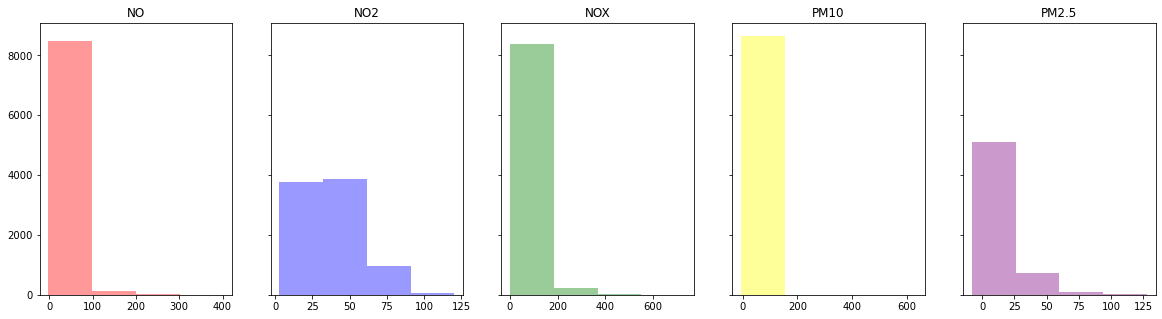

In [164]:
species = ['NO','NO2','NOX','PM10','PM2.5'] 
colors = ['red','blue','green','yellow','purple']

fig,axs = plt.subplots(1,5,figsize = (20,5),sharey=True)

for specie,color,ax in zip(species,colors,axs):
    ax.set_title(specie)
    ax.hist(pvt_df[specie],bins = 4,color = color, alpha = 0.4, label = specie)

fig.show()

8.	Ejecuta el siguiente código y comenta qué hace cada línea:

In [165]:
#Creates a dataframe by splitting the string values of the ReadingDateTime in every space and create a column for each element.
datetime_df = air_df.ReadingDateTime.str.split(' ',expand=True)
#gives names to the columns of the created dataframe
datetime_df.columns = ['Date','Time']
#Show the resulting df
datetime_df
#Creates a new df by splitting in every '/' the date column in the new dataframe
date_df = datetime_df.Date.str.split('/',expand=True)
#Names each one of the columns of the new dataframe
date_df.columns = ['Day','Month','Year']
#Shows the new dataframe with the date
date_df
#Joins the original air_df with the date df and with the time column of the datetime df and drops the ReadingDateTime column
#and the newly added year column
air_df = air_df.join(date_df).join(datetime_df.Time).drop(columns=['ReadingDateTime','Year'])
#Sets the month, day, time and species columns as indexes
air_df = air_df.set_index(['Month','Day','Time','Species'])
#Shows the resulting air_df
air_df

Value
Month Day Time  Species       
01    01  00:00 NO         3.5
          01:00 NO         3.6
          02:00 NO         2.2
          03:00 NO         2.1
          04:00 NO         3.3
...                        ...
12    31  19:00 PM2.5     -2.0
          20:00 PM2.5      6.0
          21:00 PM2.5      5.0
          22:00 PM2.5      5.0
          23:00 PM2.5      6.0

[43800 rows x 1 columns]

9. Ejecuta la siguiente instrucción y compara su salida con la del código anterior (ejercicio 8). ¿Son iguales?

In [166]:
air_df.unstack()

Value                        
Species            NO   NO2   NOX  PM10 PM2.5
Month Day Time                               
01    01  00:00   3.5  30.8  36.2  35.7   NaN
          01:00   3.6  31.5  37.0  28.5   NaN
          02:00   2.2  27.3  30.7  22.7   NaN
          03:00   2.1  23.5  26.8  20.5   NaN
          04:00   3.3  28.0  33.0  22.1   NaN
...               ...   ...   ...   ...   ...
12    31  19:00   0.7  17.5  18.5  16.3  -2.0
          20:00   0.7  17.5  18.6  14.5   6.0
          21:00   0.7  14.1  15.1   8.6   5.0
          22:00   1.1  22.0  23.6  12.5   5.0
          23:00   0.9  19.4  20.7  10.4   6.0

[8760 rows x 5 columns]

R: No son iguales, en el ejercicio 8 la columna species es un indice y el valor de cada specie es una fila. Al hacer el unstack el indice de mas bajo nivel, species, se convierte en columna lo que provoca que cada uno de los contaminantes se convierta en su propia columna.

10.	Explica cuáles son las diferencias y similitudes entre el par `melt()/pivot()` y el par `stack()/unstack()`. Si tuvieras que elegir una contraparte para `melt()` entre `stack()/unstack()`, ¿cuál elegirías? ¿Por qué?

Ambas melt y pivot son funciones para modifical el formato del dataframe. Melt sirve para convertir de un formato ancho a un formato largo, lo que quiere decir que convierte columnas en filas, mientras que pivot hace lo contrario y convierte filas en columnas.

La función stack convierte columnas en indices, transformando el dataframe de un formato ancho a un formato largo, mientras que la función unstack convierte indices en columnas haciendo lo contrario.

La contraparte de melt sería unstack, porque unstack pasaría las filas generadas por melt de vuelta a columnas.